In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import(confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_recall_curve,average_precision_score)
from collections import Counter

In [28]:
# 加载数据
data = pd.read_csv('data/creditcard.csv')
# 查看数据特征
print('数据形状',data.shape)
print('类别分布',data['Class'].value_counts())
print('欺诈比例{:.4f}%'.format(data['Class'].mean()*100))

数据形状 (284807, 31)
类别分布 Class
0    284315
1       492
Name: count, dtype: int64
欺诈比例0.1727%


In [6]:
# 数据预处理
## 分离特征和标签
X = data.drop('Class',axis=1)
y = data['Class']
# 划分训练集和测试集（分层抽样，保持比例）
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42,stratify=y)
# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# 训练模型
lr = LogisticRegression(max_iter=10000,
                        class_weight='balanced'  #处理不平衡，自动调整权重
                        )
lr.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [10]:
# 预测
y_pred = lr.predict(X_test_scaled)
y_prob = lr.predict_proba(X_test_scaled)[:,1] # 取第二列正类概率，第一列为负类概率

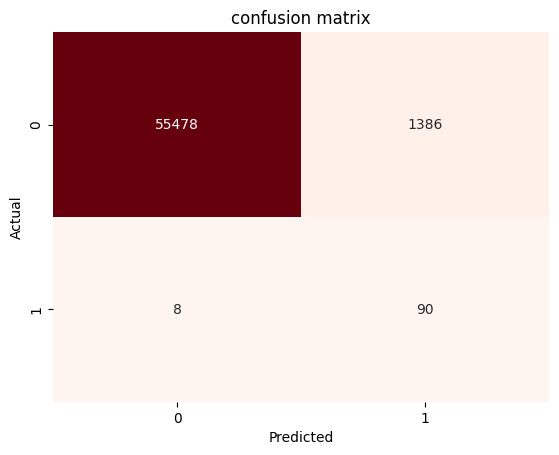

In [13]:
# 评估模型
## 混淆矩阵
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt = 'd',cmap = 'Reds',cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

In [23]:
## 分类报告
classification_report(y_test,y_pred,target_names=['normal','Fraud'])auc = roc_auc_score(y_test,y_prob)
fpr,tpr,_ = roc_curve(y_test,y_prob)

'              precision    recall  f1-score   support\n\n      normal       1.00      0.98      0.99     56864\n       Fraud       0.06      0.92      0.11        98\n\n    accuracy                           0.98     56962\n   macro avg       0.53      0.95      0.55     56962\nweighted avg       1.00      0.98      0.99     56962\n'

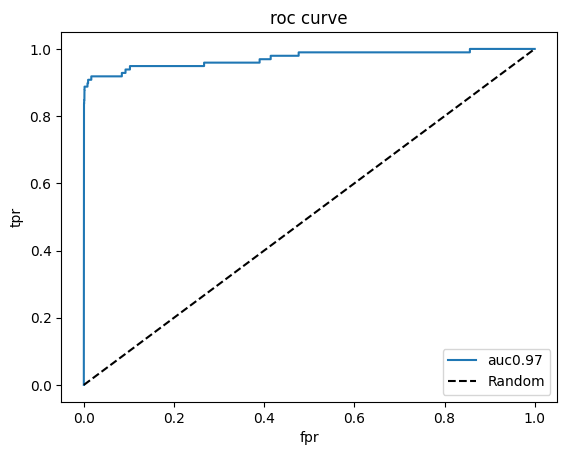

In [27]:
## auc-roc
auc = roc_auc_score(y_test,y_prob)
fpr,tpr,_ = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label = f'auc{auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')
plt.legend()
plt.show()

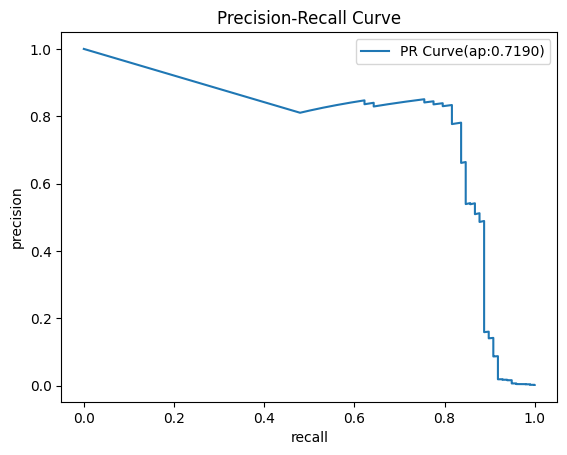

In [34]:
# PR曲线
ap = average_precision_score(y_test,y_prob)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall,precision,label = f'PR Curve(ap:{ap:.4f})')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [39]:
# 阈值调优（需要提高召回率）
## 召回率的提高可以通过降低阈值来调整
threshold = 0.1
y_pred_new = (y_prob>=threshold).astype(int)
classification_report(y_test,y_pred_new,target_names=['normal','fraud'])

'              precision    recall  f1-score   support\n\n      normal       1.00      0.80      0.89     56864\n       fraud       0.01      0.95      0.02        98\n\n    accuracy                           0.80     56962\n   macro avg       0.50      0.87      0.45     56962\nweighted avg       1.00      0.80      0.89     56962\n'

<Axes: >

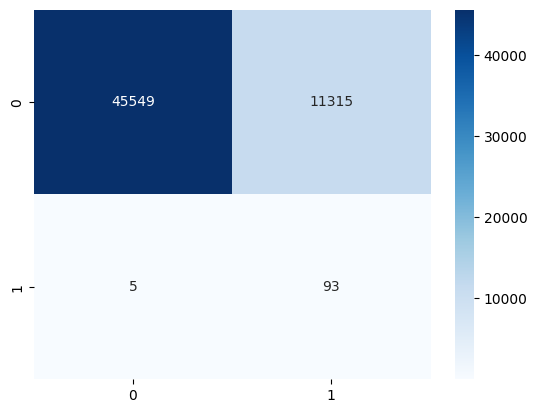

In [41]:
cm_new = confusion_matrix(y_test,y_pred_new)
sns.heatmap(cm_new,annot=True,fmt='d',cmap='Blues')

In [42]:
precision,recall,_ = precision_recall_curve(y_test,y_pred_new)

In [43]:
precision

array([0.00172045, 0.00815217, 1.        ])

In [44]:
print('acc',(93+45549)/(93+45549+11315+5))
print('Percision',93/(93+11315))
print('recall',93/(93+5))

acc 0.8012710227871213
Percision 0.008152173913043478
recall 0.9489795918367347
